## Ukraine Russia War Twitter Sentiment Analysis using Python

The dataset that I am using for the task of Twitter sentiment analysis on the Ukraine and Russia War is downloaded from Kaggle. This dataset was initially collected from Twitter and is updated regularly.

In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re

import string
import nltk
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

## Data Collection

In [174]:
data = pd.read_csv(r".\\data\filename.csv")
data.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1516995016551702528,1516995016551702528,2022-04-21 04:19:31 UTC,2022-04-21,04:19:31,0,314067919,yangedwin,Edwin Yang,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1516995011619041285,1516995011619041285,2022-04-21 04:19:29 UTC,2022-04-21,04:19:29,0,199733042,thedelphivision,a▪︎m▪︎d 👁,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1516995009039376384,1516995009039376384,2022-04-21 04:19:29 UTC,2022-04-21,04:19:29,0,1222334857260367872,baransoni,Ram baran soni,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1516995008024375296,1516995008024375296,2022-04-21 04:19:28 UTC,2022-04-21,04:19:28,0,1265937834289926145,alphawarnews,Alpha News,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1516995005826576385,1516796924782956547,2022-04-21 04:19:28 UTC,2022-04-21,04:19:28,0,1497773264348737544,putinsgottago,@Putinsgottago,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'mfa_russia', 'name': 'MFA Ru...",NaN,NaN,NaN,NaN


In [175]:
print(data.head())

                    id      conversation_id               created_at  \
0  1516995016551702528  1516995016551702528  2022-04-21 04:19:31 UTC   
1  1516995011619041285  1516995011619041285  2022-04-21 04:19:29 UTC   
2  1516995009039376384  1516995009039376384  2022-04-21 04:19:29 UTC   
3  1516995008024375296  1516995008024375296  2022-04-21 04:19:28 UTC   
4  1516995005826576385  1516796924782956547  2022-04-21 04:19:28 UTC   

         date      time  timezone              user_id         username  \
0  2022-04-21  04:19:31         0            314067919        yangedwin   
1  2022-04-21  04:19:29         0            199733042  thedelphivision   
2  2022-04-21  04:19:29         0  1222334857260367872        baransoni   
3  2022-04-21  04:19:28         0  1265937834289926145     alphawarnews   
4  2022-04-21  04:19:28         0  1497773264348737544    putinsgottago   

             name place  ... geo source user_rt_id user_rt retweet_id  \
0      Edwin Yang   NaN  ... NaN    NaN    

## Data Preprocessing

In [176]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10010 entries, 0 to 10009
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               10010 non-null  int64  
 1   conversation_id  10010 non-null  int64  
 2   created_at       10010 non-null  object 
 3   date             10010 non-null  object 
 4   time             10010 non-null  object 
 5   timezone         10010 non-null  int64  
 6   user_id          10010 non-null  int64  
 7   username         10010 non-null  object 
 8   name             10010 non-null  object 
 9   place            3 non-null      object 
 10  tweet            10010 non-null  object 
 11  language         10010 non-null  object 
 12  mentions         10010 non-null  object 
 13  urls             10010 non-null  object 
 14  photos           10010 non-null  object 
 15  replies_count    10010 non-null  int64  
 16  retweets_count   10010 non-null  int64  
 17  likes_count 

In [177]:
data.describe()

,id,conversation_id,timezone,user_id,replies_count,retweets_count,likes_count,video,near,geo,source,user_rt_id,user_rt,retweet_id,retweet_date,translate,trans_src,trans_dest
count,1.001000e+04,1.001000e+04,10010.0,1.001000e+04,10010.000000,10010.000000,10010.000000,10010.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,1.516976e+18,1.515736e+18,0.0,7.457820e+17,0.332667,0.483616,2.129471,0.112088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.069737e+13,2.046602e+16,0.0,6.547368e+17,2.096584,7.090862,34.329392,0.315490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.516958e+18,4.692169e+17,0.0,3.000300e+04,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1.516967e+18,1.516845e+18,0.0,5.422760e+08,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.516976e+18,1.516961e+18,0.0,9.590827e+17,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.516985e+18,1.516977e+18,0.0,1.398563e+18,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,1.516995e+18,1.516995e+18,0.0,1.516991e+18,116.000000,432.000000,1928.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let’s have a quick look at all the column names of the dataset

In [178]:
# data.columns
print(data.columns)

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')


## Check null values or not

In [179]:
data.isnull()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,False,False,False,False,False,False,False,False,False,True,...,True,True,True,True,True,False,True,True,True,True
1,False,False,False,False,False,False,False,False,False,True,...,True,True,True,True,True,False,True,True,True,True
2,False,False,False,False,False,False,False,False,False,True,...,True,True,True,True,True,False,True,True,True,True
3,False,False,False,False,False,False,False,False,False,True,...,True,True,True,True,True,False,True,True,True,True
4,False,False,False,False,False,False,False,False,False,True,...,True,True,True,True,True,False,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10005,False,False,False,False,False,False,False,False,False,True,...,True,True,True,True,True,False,True,True,True,True
10006,False,False,False,False,False,False,False,False,False,True,...,True,True,True,True,True,False,True,True,True,True
10007,False,False,False,False,False,False,False,False,False,True,...,True,True,True,True,True,False,True,True,True,True
10008,False,False,False,False,False,False,False,False,False,True,...,True,True,True,True,True,False,True,True,True,True


In [180]:
data.isnull().sum()

id                     0
conversation_id        0
created_at             0
date                   0
time                   0
timezone               0
user_id                0
username               0
name                   0
place              10007
tweet                  0
language               0
mentions               0
urls                   0
photos                 0
replies_count          0
retweets_count         0
likes_count            0
hashtags               0
cashtags               0
link                   0
retweet                0
quote_url           9214
video                  0
thumbnail           8888
near               10010
geo                10010
source             10010
user_rt_id         10010
user_rt            10010
retweet_id         10010
reply_to               0
retweet_date       10010
translate          10010
trans_src          10010
trans_dest         10010
dtype: int64

So there is null value let's remove it

In [181]:
# data = data.dropna()

## We only need three columns for this task (username, tweet, and language); I will only select these columns and move forward

In [182]:
data = data[["username","tweet","language"]]

Let’s have a look at whether any of these columns contains any null values or not

In [183]:
data.isnull().sum()

username    0
tweet       0
language    0
dtype: int64

So none of the columns has null values, let’s have a quick look at how many tweets are posted in which language

In [184]:
data["language"].value_counts()

en     9072
pt      256
und     162
it      106
in       77
ru       65
ja       42
es       37
zh       22
hi       22
ca       21
de       11
ar       11
fr       10
tl        9
ta        8
th        7
sv        6
pl        6
nl        6
et        6
ro        5
ur        4
fi        4
cs        4
te        3
tr        3
ml        3
uk        2
no        2
ht        2
kn        2
mr        2
bn        2
el        2
is        1
hu        1
am        1
da        1
lv        1
pa        1
ne        1
gu        1
Name: language, dtype: int64

So most of the tweets are in English. Let’s prepare this data for the task of sentiment analysis. Here I will remove all the links, punctuation, symbols and other language errors from the tweets

In [185]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["tweet"] = data["tweet"].apply(clean)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Now let’s have a look at the wordcloud of the tweets, which will show the most frequently used words in the tweets by people sharing their feelings and updates about the Ukraine and Russia war

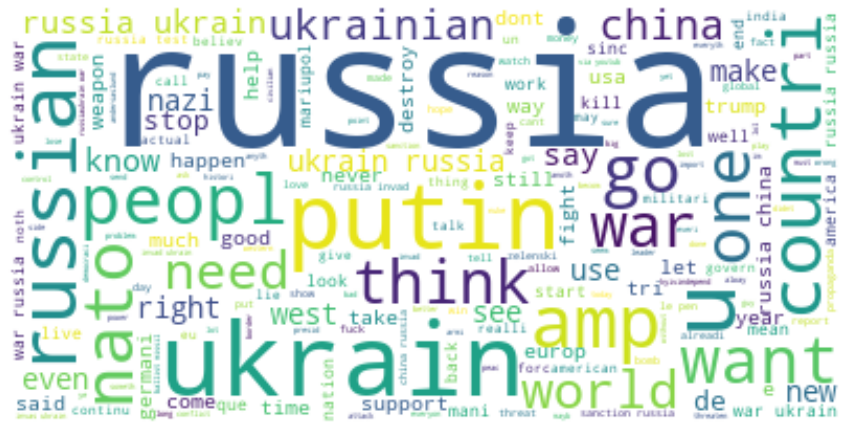

In [186]:
text = " ".join(i for i in data.tweet)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Now I will add three more columns in this dataset as Positive, Negative, and Neutral by calculating the sentiment scores of the tweets

In [187]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["tweet"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["tweet"]]
data["Neutral"]  = [sentiments.polarity_scores(i)["neu"] for i in data["tweet"]]

data = data[["tweet","Positive","Negative","Neutral"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                               tweet  Positive  Negative  \
0  un un help prorussian peopl ukrain move russia...     0.243     0.298   
1  former cia chief russia oper know russian stra...     0.150     0.097   
2  क्या हो अगर एक हो जाएं भारतरूस और इजरायल  indi...     0.000     0.000   
3  🇯🇵  japanes resid spoke favor strengthen sanct...     0.238     0.000   
4  mfarussia statedept rusembusa missionrussian r...     0.000     0.000   

   Neutral  
0    0.459  
1    0.752  
2    1.000  
3    0.762  
4    1.000  


Now let’s have a look at the most frequent words used by people with positive sentiments

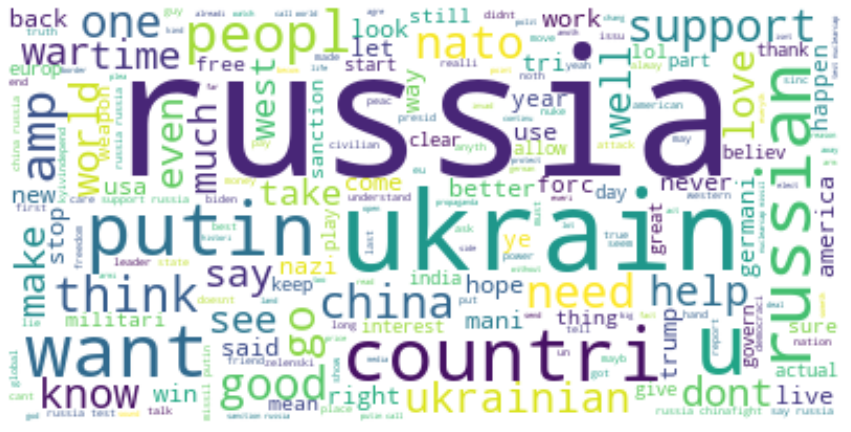

In [188]:
positive =' '.join([i for i in data['tweet'][data['Positive'] > data["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Now let’s have a look at the most frequent words used by people with negative sentiments

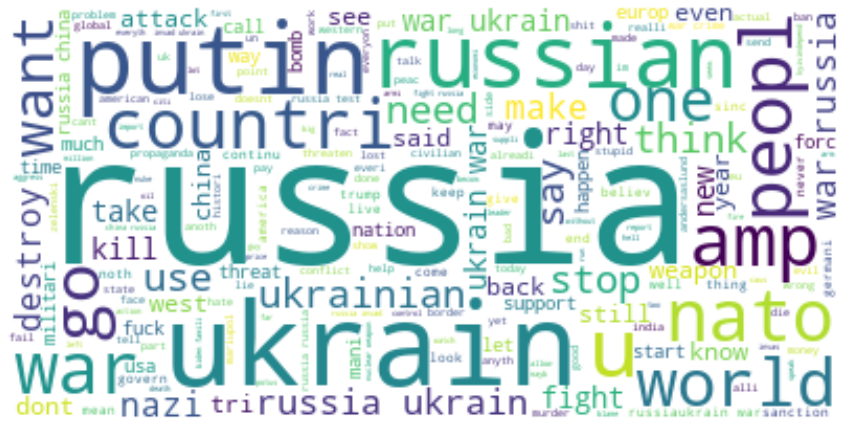

In [190]:
negative = " ".join([i for i in data["tweet"] [data["Negative"] > data["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Thank You